<a href="https://colab.research.google.com/github/principioincertidumbre/ComputerVision/blob/main/IntroCV_Tarea_2_Sof%C3%ADa_Vits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 2</h1>
</center>

### Magíster en Data Science
### U. del Desarrollo

-----------------------
<div align="right">

Estudiante: Sofía Vits

Profesor: Takeshi Asahi

Fecha de Entrega: Lunes 5, Mayo 20245.
</div>

## Instrucciones

1. Diseñar un flujo de procesamiento a nivel abstracto: adquisición de imágenes, pre-procesamiento, procesamiento de imágenes, cálculo de la medición, almacenamiento.

2. Con la base de datos seleccionada, implementar un sistema de reconocimiento y/o procesamiento en el cual se realice una medida o inferencia sobre imagen. Puede ser la detección de un objeto, medición de distancias entre píxeles de alguna característica, medición del tamaño de algún objeto (en cantidad de píxeles) clasificación de la imagen, entre otros.

3. Para procesar el conjunto completo de imágenes, medir los tiempos de ejecución del proceso completo. Realizar la medición para el 50% y el 100% de la imágenes varias veces, de manera de obtener algunas figuras estadísticas: tiempo máximo, tiempo mínimo, tiempo medio, desviación estándar del tiempo.

4. Hacer resumen de los resultados del procesamiento. Para ello debe decidir una métrica para indicar si el procesamiento es satisfactorio. Para esto último algunas veces es necesario hacer la evaluación en forma manual, por lo tanto, si fuera este el caso, seleccionar un sub-conjunto de las imágenes (por ejemplo, unas 50) y comparar el desempeño del algoritmo en estas imágenes.

## Formato de Entrega:
1. Escribir un informe o entregar el notebook con comentarios y documentación, incluyendo el análisis (comentando) los resultados. Recordar las recomendaciones de la Tarea 1, de **no mostrar todas las imágenes procesadas en el notebook** sino que solamente un número reducido de ejemplos. Los comentarios son muy importantes.

2. De percatarse que si encontrarn que el set de imágenes propuesto en la Tarea 1 no es el adecuado, se puede realizar un cambio en el dataset. Justificar el cambio. Este tipo de decisiones puede ocurrir en un proyecto. Muchas veces es necesario probar una variedad de datasets.

3. No está permitido el uso de Herramientas de Inteligencia Artificial para generar el informe. El uso de Inteligencia Artificial Generativa solamente se remite a la sugerencia de código parcial, como copilot.

# Introducción

La papas es un tubérculo que fue domesticado en la región andina de Sudamérica. Junto con el trigo y arroz, es uno de los cultivos más importantes para la alimentación de la especie humana.

Lamentablemente, existen enfermedades de las papas que generan pérdidas económicas y afectan la calidad del producto final. Por lo tanto, es importante detectar estas enfermedades a tiempo.

El dataset "Potato Diseases Datasets" fue compilado a partir de diversas páginas web, siendo validado por el Instituto de Investigación Agrícola de Bangladesh (BARI).

El dataset completo contiene 451 imágenes, siendo clasificadas como common scab (papas infectadas por bacteria Streptomyces scabies, contiene 62 imágenes), blackleg (papas infectadas por bacteria Pectobacterium atrosepticum, contiene 60 imágenes), dry rot (infección causada por hongos del género Fusarium, contiene 60 imágenes), pink rot (infección fúngica causada por Phytophthora erythroseptica, contiene 57 imágenes), black scurf (infección fúngica, contiene 58 imágenes), papas sanas (80 imágenes) y papas afectadas por otros tipos de infecciones (74 imágenes).

Considerando las enfermedades más comunes de la papa en Chile, se considerarán las clases common scab, blackleg, dry rot y papas sanas para realizar una clasificación multiclase. Esta muestra del dataset contiene 262 imágenes en total.


Dataset utilizado:

https://www.kaggle.com/datasets/mukaffimoin/potato-diseases-datasets/

Fuente del dataset:

F. T. J. Faria, M. Bin Moin, A. Al Wase, M. R. Sani, K. M. Hasib and M. S. Alam, "Classification of Potato Disease with Digital Image Processing Technique: A Hybrid Deep Learning Framework," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0820-0826, doi: 10.1109/CCWC57344.2023.10099162.

Otras fuentes:

Centro Internacional de la Papa. "Datos y cifras de la papa". Recuperado de: https://cipotato.org/es/potato/potato-facts-and-figures/

Méndez, P., Gaete, N. "Principales enfermedades que afectan al cultivo de la papa", INIA Carillanca. Recuperado de: https://tizon.inia.cl/assets/boletines/inia%20carillanca%20-%20principales%20enfermedades%20que%20afectan%20el%20cultivo%20de%20la%20papa.pdf

North Dakota State University. "Common scab". Recuperado de: https://www.ag.ndsu.edu/potatoextension/common-scab

The Royal Horticultural Society. "Potato blackleg". Recuperado de: https://www.rhs.org.uk/disease/potato-blackleg

Cornell University. "Fusarium Dry Rot of Potato". Recuperado de: https://www.vegetables.cornell.edu/pest-management/disease-factsheets/fusarium-dry-rot-of-potato/

# Metodología

1.- Cargar la muestra del dataset y dividir las carpetas en carpeta de entrenamiento y test.

2.- Implementar un algoritmo de clasificación multiclase, midiendo el tiempo mínimo, tiempo máximo, tiempo promedio y desviación estándard del tiempo de procesamiento.

3.- Comparar los resultados mediante métricas para verificar qué tipo de preprocesamiento permite obtener los mejores resultados.


# Desarrollo

In [13]:
!pip install split-folders

In [43]:
from PIL import Image
from os.path import exists
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Abrir una imagen de cada carpeta que contiene imágenes de papas enfermas o sanas

inPath1  = '/content/drive/MyDrive/potato/Common Scab proc'
inPath2  = '/content/drive/MyDrive/potato/Blackleg proc'
inPath3  = '/content/drive/MyDrive/potato/Dry Rot proc'
inPath4 = '/content/drive/MyDrive/potato/Healthy Potatoes proc'
inPath5 = '/content/drive/MyDrive/potato/Common Scab Gauss'
inPath6 = '/content/drive/MyDrive/potato/Blackleg Gauss'
inPath7 = '/content/drive/MyDrive/potato/Dry Rot Gauss'
inPath8 = '/content/drive/MyDrive/potato/Healthy Potatoes Gauss'
inPath9 = '/content/drive/MyDrive/potato/Common Scab Sobel'
inPath10 = '/content/drive/MyDrive/potato/Blackleg Sobel'
inPath11 = '/content/drive/MyDrive/potato/Dry Rot Sobel'
inPath12 = '/content/drive/MyDrive/potato/Healthy Potatoes Sobel'

# Define carpetas de salida, las cuales serán creadas posteriormente en este trabajo

outPath1  = '/content/drive/MyDrive/potato/data/common_scab'
outPath2  = '/content/drive/MyDrive/potato/data/blackleg'
outPath3  = '/content/drive/MyDrive/potato/data/dry_rot'
outPath4 = '/content/drive/MyDrive/potato/data/healthy_potato'
outPath5 = '/content/drive/MyDrive/potato/data_g/common_scab'
outPath6 = '/content/drive/MyDrive/potato/data_g/blackleg'
outPath7 = '/content/drive/MyDrive/potato/data_g/dry_rot'
outPath8 = '/content/drive/MyDrive/potato/data_g/healthy_potato'
outPath9 = '/content/drive/MyDrive/potato/data_s/common_scab'
outPath10 = '/content/drive/MyDrive/potato/data_s/blackleg'
outPath11 = '/content/drive/MyDrive/potato/data_s/dry_rot'
outPath12 = '/content/drive/MyDrive/potato/data_s/healthy_potato'

In [20]:
# Copia archivos

import glob

# Carpeta Common Scab
path = outPath1 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path):
    os.makedirs(path)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path2 = outPath2

if not os.path.exists(path2):
    os.makedirs(path2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path2,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path3 = outPath3

if not os.path.exists(path3):
    os.makedirs(path3)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path3,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path4 = outPath4

if not os.path.exists(path4):
    os.makedirs(path4)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path4,'/',os.path.split(filename)[1]))

In [21]:
# Copia archivos filtro Gaussiano

import glob

# Carpeta Common Scab
path5 = outPath5 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path5):
    os.makedirs(path5)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Gauss/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path5,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path6 = outPath6

if not os.path.exists(path6):
    os.makedirs(path6)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path6,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path7 = outPath7

if not os.path.exists(path7):
    os.makedirs(path7)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path7,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path8 = outPath8

if not os.path.exists(path8):
    os.makedirs(path8)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path8,'/',os.path.split(filename)[1]))

In [22]:
# Copia archivos filtro Sobel

import glob

# Carpeta Common Scab
path9 = outPath9 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path9):
    os.makedirs(path9)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Sobel/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path9,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path10 = outPath10

if not os.path.exists(path10):
    os.makedirs(path10)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Sobel/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path10,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path11 = outPath11

if not os.path.exists(path11):
    os.makedirs(path11)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path11,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path12 = outPath12

if not os.path.exists(path12):
    os.makedirs(path12)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path12,'/',os.path.split(filename)[1]))

## Clasificador Support Vector Machine para dataset sin filtrar

In [69]:
Categories=['blackleg', 'common_scab', 'dry_rot', 'healthy_potato']

In [70]:
flat_data_arr=[]
target_arr=[]

In [71]:
datadir='/content/drive/MyDrive/potato/data'

In [74]:
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(200,200,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_papa=pd.DataFrame(flat_data)
df_papa['Categoría']=target
df_papa

loading... category : blackleg
loaded category:blackleg successfully
loading... category : common_scab
loaded category:common_scab successfully
loading... category : dry_rot
loaded category:dry_rot successfully
loading... category : healthy_potato
loaded category:healthy_potato successfully


,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,Categoría
0,0.019151,0.019151,0.019151,0.015644,0.015644,0.015644,0.014345,0.014345,0.014345,0.011765,...,0.001953,0.001953,0.001953,0.000320,0.000320,0.000320,0.010631,0.010631,0.010631,0
1,0.000000,0.007843,0.027451,0.000000,0.007843,0.027451,0.000000,0.009020,0.028627,0.000000,...,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
3,0.482353,0.505882,0.505882,0.482353,0.505882,0.505882,0.478431,0.501961,0.501961,0.474510,...,0.423529,0.454902,0.466667,0.419608,0.450980,0.462745,0.419608,0.450980,0.462745,0
4,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,...,0.043137,0.043137,0.043137,0.000000,0.000000,0.000000,0.039216,0.039216,0.039216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
258,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,...,0.807843,0.819608,0.839216,0.796078,0.807843,0.827451,0.788235,0.800000,0.819608,3
259,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
260,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [75]:
x=df_papa.iloc[:,:-1]
y=df_papa.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print('Splitted Successfully')

Splitted Successfully


In [76]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [77]:
y_pred = classifier.predict(x_test)
y_pred

array([3, 3, 3, 2, 2, 2, 0, 3, 0, 1, 1, 3, 3, 3, 3, 3, 1, 2, 3, 1, 2, 0,
       2, 3, 1, 1, 1, 2, 2, 1, 0, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 0, 1, 3,
       0, 1, 3, 2, 0, 2, 3, 0, 1])

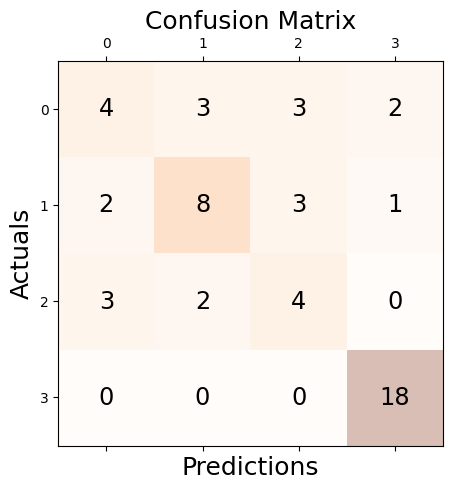

In [78]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
print('Accuracy  :', accuracy_score(y_test, y_pred)*100 ,"%")
print('Precision :' , precision_score(y_test, y_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_test, y_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_test, y_pred, average='weighted')*100 ,"%")

Accuracy  : 64.15094339622641 %
Precision : 62.22130071186675 %
Recall    : 64.15094339622641 %
F1 Score  : 62.77845880626417 %


## Clasificador Support Vector Machine para dataset filtro Gaussiano

In [80]:
flat_data_arr_g=[]
target_arr_g=[]

In [81]:
datadir_g='/content/drive/MyDrive/potato/data_g'

In [82]:
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir_g,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(200,200,3))
    flat_data_arr_g.append(img_resized.flatten())
    target_arr_g.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data_g=np.array(flat_data_arr_g)
target_g=np.array(target_arr_g)
df_papa_g=pd.DataFrame(flat_data_g)
df_papa_g['Categoría']=target_g
df_papa_g

loading... category : blackleg
loaded category:blackleg successfully
loading... category : common_scab
loaded category:common_scab successfully
loading... category : dry_rot
loaded category:dry_rot successfully
loading... category : healthy_potato
loaded category:healthy_potato successfully


,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,Categoría
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.009020,0.009020,0.009020,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0
1,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,0.482353,...,0.450980,0.450980,0.450980,0.450980,0.450980,0.450980,0.450980,0.450980,0.450980,0
2,0.007843,0.015686,0.011765,0.007843,0.015686,0.011765,0.007843,0.015686,0.011765,0.007843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,0.047059,...,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
258,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.768627,...,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,3
259,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,3
260,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [83]:
x_g=df_papa_g.iloc[:,:-1]
y_g=df_papa_g.iloc[:,-1]
x_g_train,x_g_test,y_g_train,y_g_test=train_test_split(x_g,y_g,test_size=0.20,random_state=42)
print('Splitted Successfully')

Splitted Successfully


In [84]:
classifier_g = SVC(kernel = 'rbf', random_state = 0)
classifier_g.fit(x_g_train, y_g_train)

SVC(random_state=0)

In [85]:
y_g_pred = classifier_g.predict(x_g_test)
y_g_pred

array([3, 3, 3, 2, 0, 2, 2, 3, 0, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2, 1, 2,
       2, 3, 1, 1, 0, 0, 1, 2, 2, 3, 3, 1, 0, 3, 1, 3, 3, 2, 3, 2, 1, 2,
       2, 0, 3, 0, 1, 1, 3, 2, 0])

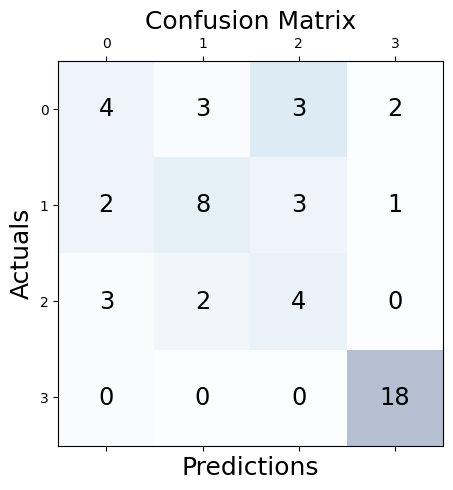

In [86]:
cm_g = confusion_matrix(y_g_test, y_g_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_g, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_g.shape[0]):
    for j in range(cm_g.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [87]:
print('Accuracy  :', accuracy_score(y_g_test, y_g_pred)*100 ,"%")
print('Precision :' , precision_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")

Accuracy  : 60.37735849056604 %
Precision : 64.1745283018868 %
Recall    : 60.37735849056604 %
F1 Score  : 61.22518990443518 %


## Clasificador Support Vector Machine para dataset filtro Sobel

In [88]:
flat_data_arr_s=[]
target_arr_s=[]

In [89]:
datadir_s='/content/drive/MyDrive/potato/data_s'

In [90]:
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir_s,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(200,200,3))
    flat_data_arr_s.append(img_resized.flatten())
    target_arr_s.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data_s=np.array(flat_data_arr_s)
target_s=np.array(target_arr_s)
df_papa_s=pd.DataFrame(flat_data_s)
df_papa_s['Categoría']=target_s
df_papa_s

loading... category : blackleg
loaded category:blackleg successfully
loading... category : common_scab
loaded category:common_scab successfully
loading... category : dry_rot
loaded category:dry_rot successfully
loading... category : healthy_potato
loaded category:healthy_potato successfully


,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,Categoría
0,0.000235,0.000235,0.000235,0.005333,0.005333,0.005333,0.011765,0.011765,0.011765,0.010118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.021198,0.021198,0.021198,0.020102,0.020102,0.020102,0.018925,0.018925,0.018925,0.018431,...,0.061898,0.061898,0.061898,0.035211,0.035211,0.035211,0.011288,0.011288,0.011288,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.019608,0.019608,0.019608,0.027451,0.027451,0.027451,0.019608,...,0.023529,0.023529,0.023529,0.015686,0.015686,0.015686,0.003922,0.003922,0.003922,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.141176,0.141176,0.141176,0.082353,0.082353,0.082353,0.196078,0.196078,0.196078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
258,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.772549,0.768627,...,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,0.615686,3
259,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,3
260,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [91]:
x_s=df_papa_s.iloc[:,:-1]
y_s=df_papa_s.iloc[:,-1]
x_s_train,x_s_test,y_s_train,y_s_test=train_test_split(x_s,y_s,test_size=0.20,random_state=42)
print('Splitted Successfully')

Splitted Successfully


In [92]:
classifier_s = SVC(kernel = 'rbf', random_state = 0)
classifier_s.fit(x_s_train, y_s_train)

SVC(random_state=0)

In [93]:
y_s_pred = classifier_s.predict(x_s_test)
y_s_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 1, 3, 0, 3, 3, 3, 0, 0, 3, 1, 2, 2,
       0, 3, 1, 2, 2, 1, 0, 0, 0, 3, 3, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 1,
       0, 2, 3, 0, 0, 2, 3, 2, 0])

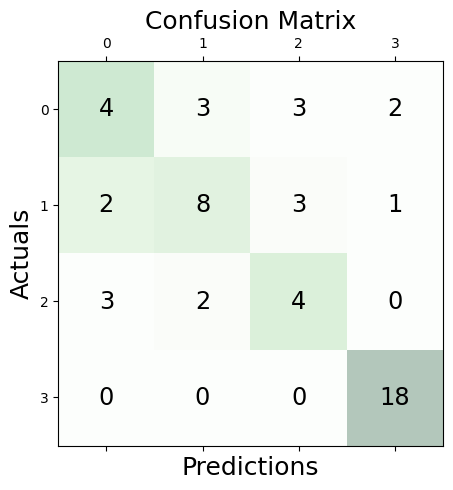

In [94]:
cm_s = confusion_matrix(y_s_test, y_s_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_s, cmap=plt.cm.Greens, alpha=0.3)
for i in range(cm_s.shape[0]):
    for j in range(cm_s.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [95]:
print('Accuracy  :', accuracy_score(y_s_test, y_s_pred)*100 ,"%")
print('Precision :' , precision_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")

Accuracy  : 81.13207547169812 %
Precision : 81.69811320754717 %
Recall    : 81.13207547169812 %
F1 Score  : 80.63791554357593 %


# Conclusiones